In [1]:
install.packages("igraph") 
install.packages("network") 
install.packages("sna")
install.packages("ggraph")
install.packages("visNetwork")
install.packages("threejs")
install.packages("networkD3")
install.packages("ndtv")

#https://kateto.net/network-visualization

Installing package into 'C:/Users/Greig/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



  There is a binary version available but the source version is later:
       binary source needs_compilation
igraph  1.2.6  1.3.4              TRUE

  Binaries will be installed
package 'igraph' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Greig\AppData\Local\Temp\RtmpuiMKrA\downloaded_packages


Installing package into 'C:/Users/Greig/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
also installing the dependency 'statnet.common'




  There are binary versions available but the source versions are later:
               binary source needs_compilation
statnet.common  4.4.1  4.6.0              TRUE
network        1.16.1 1.17.2              TRUE

  Binaries will be installed
package 'statnet.common' successfully unpacked and MD5 sums checked
package 'network' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Greig\AppData\Local\Temp\RtmpuiMKrA\downloaded_packages


Installing package into 'C:/Users/Greig/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



  There is a binary version available but the source version is later:
    binary source needs_compilation
sna    2.6    2.7              TRUE

  Binaries will be installed
package 'sna' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Greig\AppData\Local\Temp\RtmpuiMKrA\downloaded_packages


Installing package into 'C:/Users/Greig/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'ggraph' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Greig\AppData\Local\Temp\RtmpuiMKrA\downloaded_packages


Installing package into 'C:/Users/Greig/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



  There is a binary version available but the source version is later:
           binary source needs_compilation
visNetwork  2.0.9  2.1.0             FALSE



installing the source package 'visNetwork'

Installing package into 'C:/Users/Greig/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'threejs' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Greig\AppData\Local\Temp\RtmpuiMKrA\downloaded_packages


Installing package into 'C:/Users/Greig/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'networkD3' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Greig\AppData\Local\Temp\RtmpuiMKrA\downloaded_packages


Installing package into 'C:/Users/Greig/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
also installing the dependencies 'statnet.common', 'network', 'networkDynamic', 'animation', 'base64'




  There are binary versions available but the source versions are later:
               binary source needs_compilation
statnet.common  4.4.1  4.6.0              TRUE
network        1.16.1 1.17.2              TRUE
networkDynamic 0.10.1 0.11.2              TRUE
animation         2.6    2.7             FALSE
ndtv           0.13.0 0.13.2             FALSE

  Binaries will be installed
package 'statnet.common' successfully unpacked and MD5 sums checked
package 'network' successfully unpacked and MD5 sums checked
package 'networkDynamic' successfully unpacked and MD5 sums checked
package 'base64' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Greig\AppData\Local\Temp\RtmpuiMKrA\downloaded_packages


installing the source packages 'animation', 'ndtv'

Warning message in install.packages("ndtv"):
"installation of package 'ndtv' had non-zero exit status"

In [654]:
library('visNetwork') 
library('dplyr')
library('tidyverse')
library("Matrix")
library("reshape2")
library('igraph')

Q_table = "..//data//ecopath//edges_Qmatrix.csv"
stats_table = "..//data//ecopath//nodes_statstab.csv"

mm <- as.matrix(read.table(Q_table, header=T,sep=",", row.names=1))
edges_long <- melt(mm)
edges1 <- rename(edges_long, "from" = "Var1", "to" = "Var2", "weight" = "value")
edges1$to <- gsub('\\.', '-', edges1$to) # matrix converts - to . so convert back
edges1 <- edges1 %>% filter(weight > 0) # filter zeros out
edges1 <- edges1 %>% filter(to != "Detritus_Closure") 
edges1 <- edges1 %>% filter(from != "Detritus_Closure") 


nodes1 <- read.table(stats_table, header=T,sep=",", row.names=1)
nodes1 <- nodes1 %>% filter(Name != "Detritus_Closure") # filter zeros out

# duplicate TL to use as y location
nodes1$y = nodes1$TL
# duplicate 'type' to use as x location
nodes1$x = nodes1$type_x3

net <- graph_from_data_frame(d=edges1, vertices=nodes1, directed=T) 




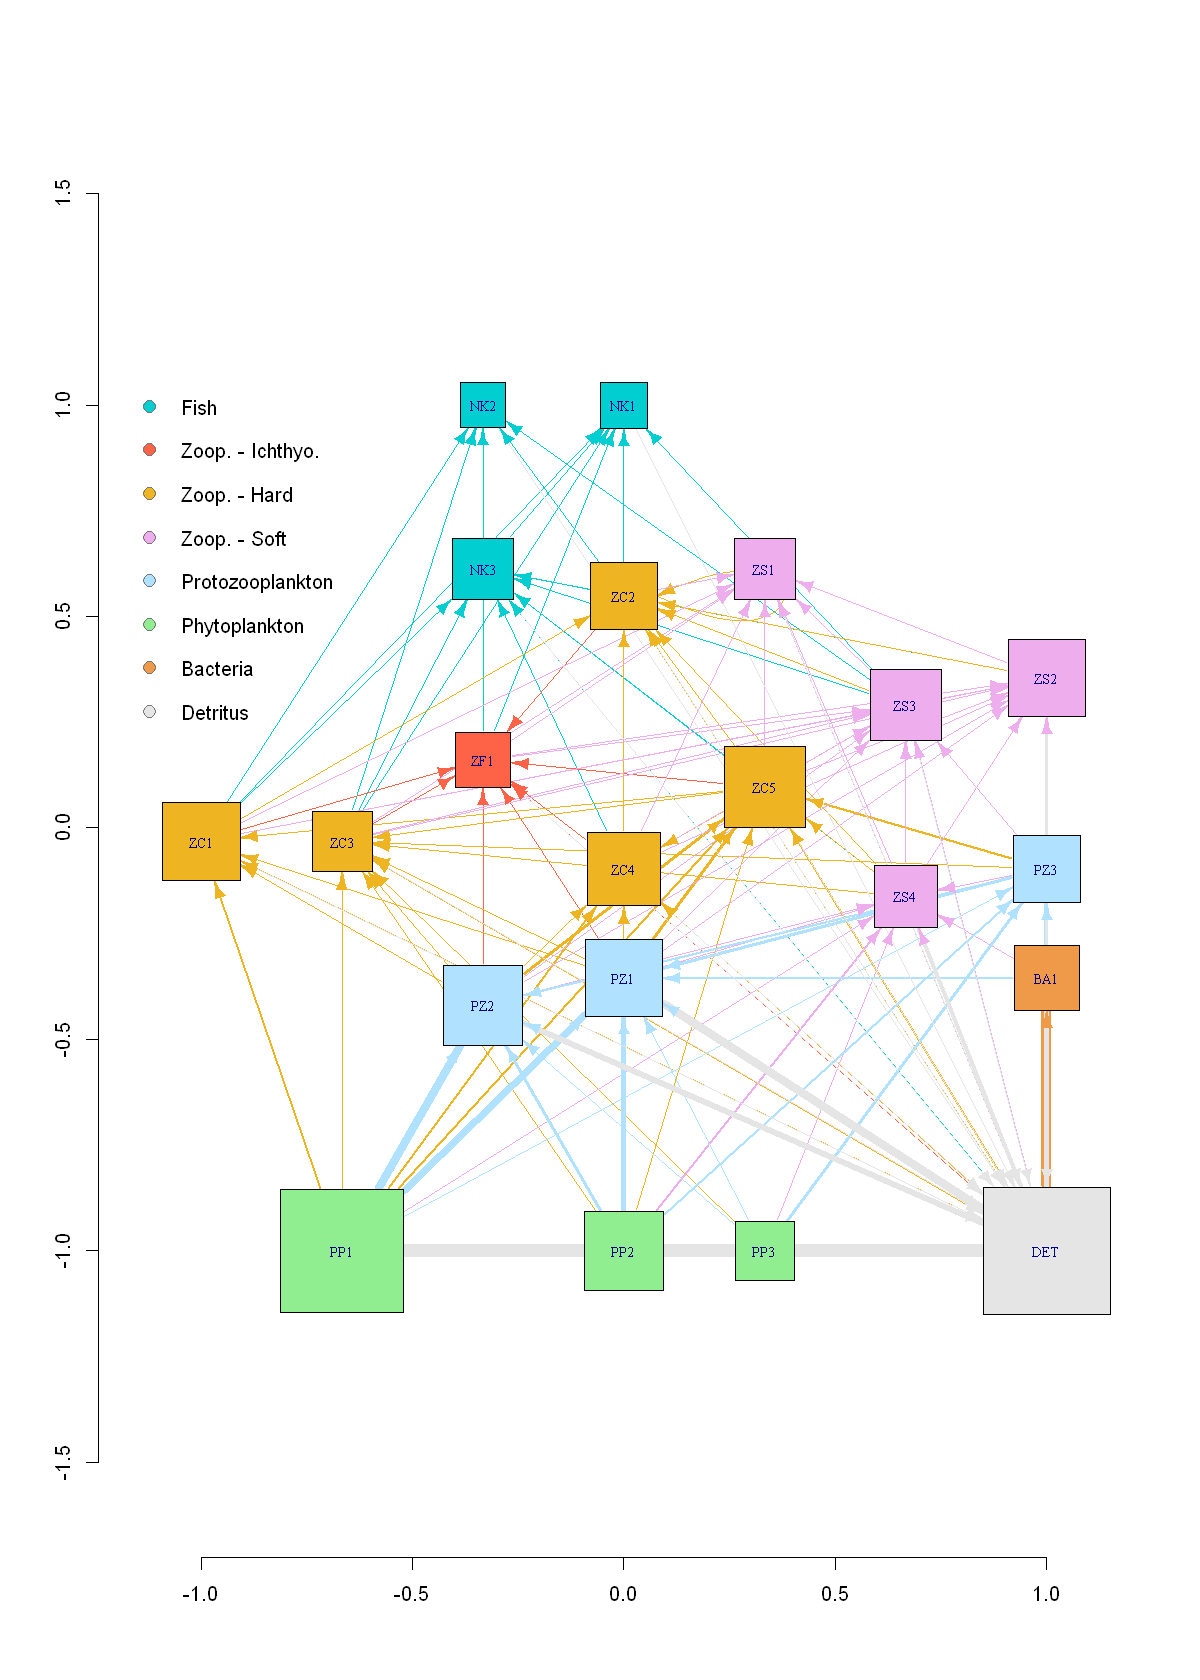

In [692]:
options(repr.plot.width=10, repr.plot.height=14)


V(net)$size = sqrt(V(net)$B) * 2.6 + 10
E(net)$width <- sqrt(E(net)$weight) * 0.2
l <- layout_nicely(net)

# https://bookdown.org/hneth/ds4psy/D-3-apx-colors-basics.html
colrs <- c("darkturquoise", "tomato", "goldenrod2", "plum2", "lightskyblue1", "palegreen2", "tan2", "gray90")
V(net)$color <- colrs[V(net)$type_num]

# color based on incoming edges
edge.start <- ends(net, es=E(net), names=F)[,2]
edge.col <- V(net)$color[edge.start]
# ecol <- rep("gray80", ecount(net))
# inc.edges <- incident(net,  V(net)[type=="ZS"], mode="in")
# ecol[inc.edges] <- "plum2"
#inc.edges <- incident(net,  V(net)[type=="NK"], mode="all")
#ecol[inc.edges] <- "darkturquoise"

# the problem with adding axes and labels is with asp (aspect ratio)
# I can't control axis max / min if asp = 1 and if asp = 0 then 
# weird problems arise with edge drawing
plot(net, 
     edge.arrow.size=.4, 
     axes=T,
     #xlim=(c(0,10)), ylim=c(0,6),
     asp=1, rescale=T, 
     vertex.label=V(net)$lbl_shrt,
     vertex.label.font=1,
     vertex.label.cex=0.7,
     vertex.shape="square",
     edge.color=edge.col,
     layout=l)

legend(x=-1.2, y=1.1, c("Fish","Zoop. - Ichthyo.","Zoop. - Hard","Zoop. - Soft", "Protozooplankton","Phytoplankton","Bacteria", "Detritus"), pch=21,
       col="#777777", pt.bg=colrs, pt.cex=1.4, cex=1, bty="n", ncol=1)

#plot(net, edge.arrow.size=.4, axes=T, asp=0, rescale=F)
#l <- layout_in_circle(net)
#plot(net, edge.arrow.size=.4, edge.curved=.3, layout=l)

# cover the x axis
#rect(-0.2, -3, 11, -1, col = "white", border = "black")

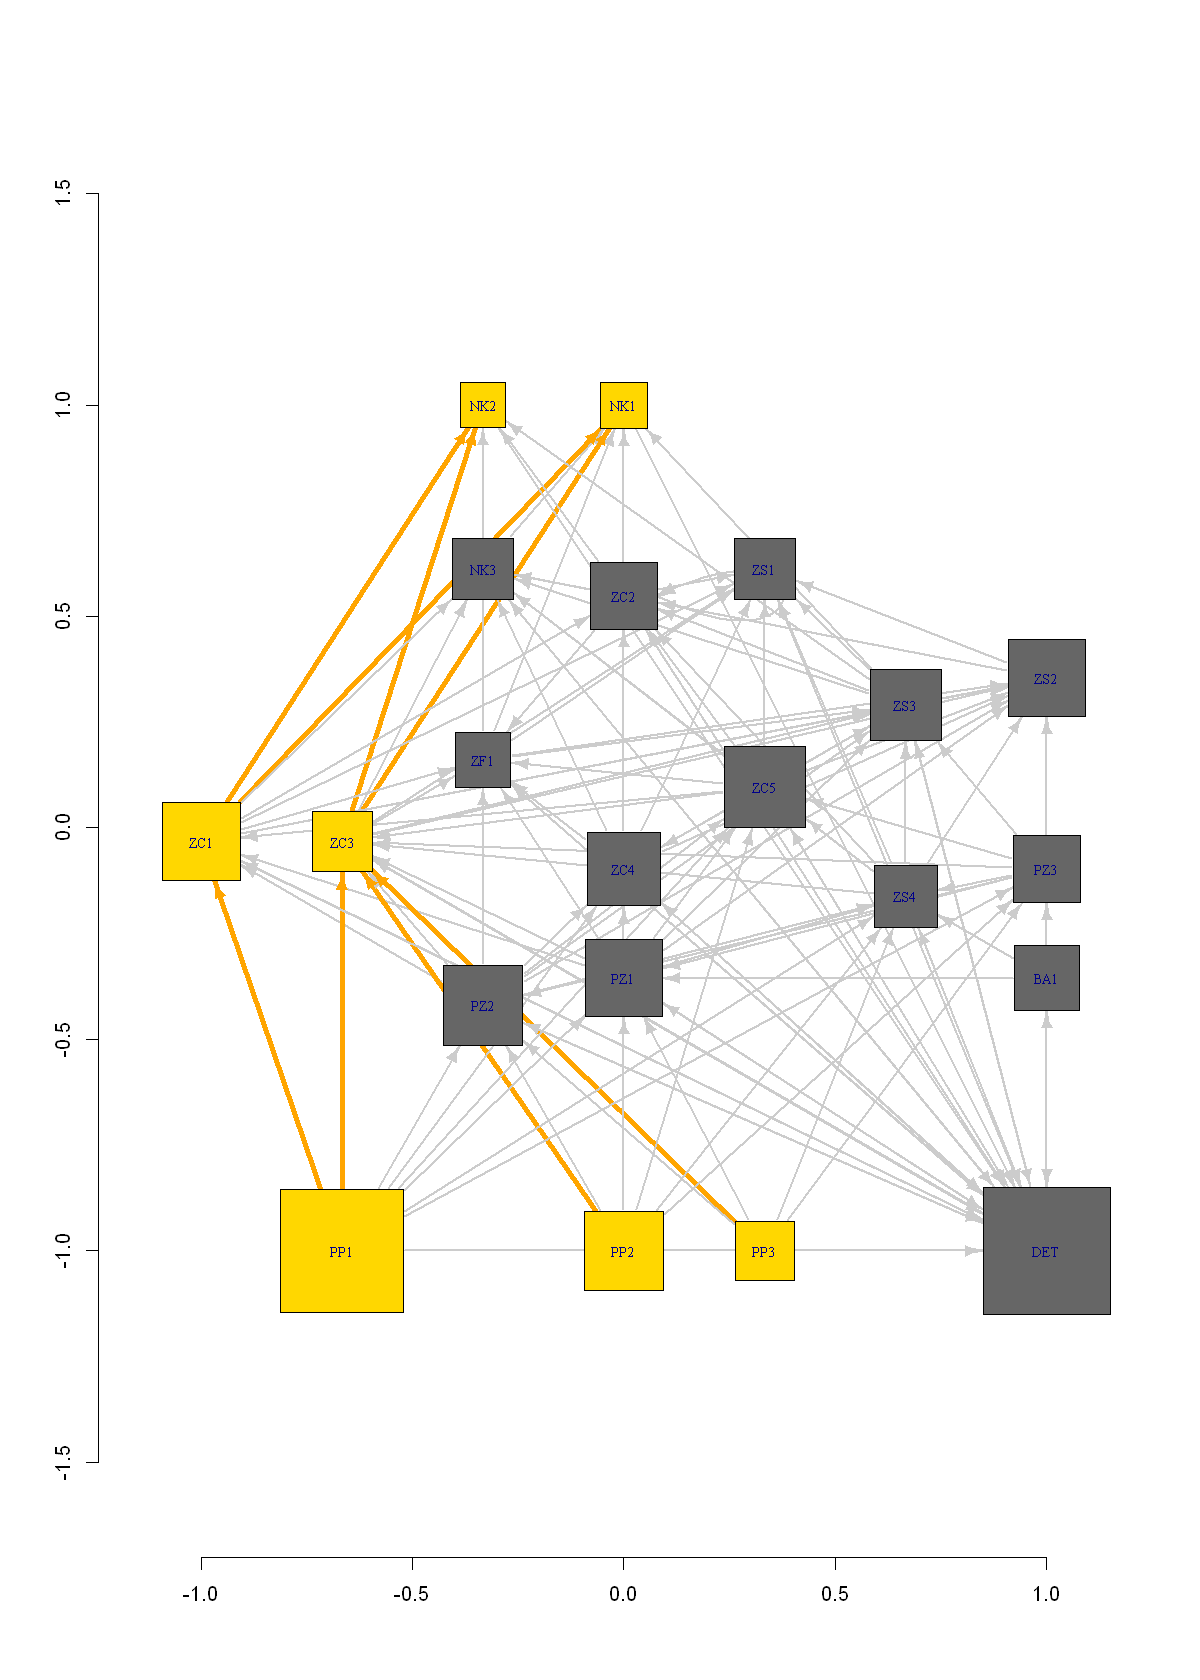

In [691]:
#absolute shortest path
# NK1_path_PP1 <- all_shortest_paths(net,
#                            to = V(net)[name=="NK1-COH"],
#                            from = V(net)[name=="PP1-DIA"], 
#                           weights = NA) 

# get all shortest paths
# Generate edge and node color variable to plot the path:
ecol <- rep("gray80", ecount(net))
vcol <- rep("gray40", vcount(net))

ew <- rep(2, ecount(net))

# group NK1
vpaths = all_shortest_paths(net, V(net)[name=="PP1-DIA"],V(net)[name=="NK1-COH"],weights=NA)$res
epaths = lapply(vpaths, function(x) E(net, path=x))
    
for (p in vpaths){
    vcol[unlist(p)] <- "gold"
}
for (p in epaths){
    ecol[unlist(p)] <- "orange"
    ew[unlist(p)] <- 4
}             
  
vpaths = all_shortest_paths(net, V(net)[name=="PP2-NAN"],V(net)[name=="NK1-COH"],weights=NA)$res
epaths = lapply(vpaths, function(x) E(net, path=x))
    
for (p in vpaths){
    vcol[unlist(p)] <- "gold"
}
for (p in epaths){
    ecol[unlist(p)] <- "orange"
    ew[unlist(p)] <- 4
}
              
vpaths = all_shortest_paths(net, V(net)[name=="PP3-PIC"],V(net)[name=="NK1-COH"],weights=NA)$res
epaths = lapply(vpaths, function(x) E(net, path=x))
    
for (p in vpaths){
    vcol[unlist(p)] <- "gold"
}
for (p in epaths){
    ecol[unlist(p)] <- "orange"
    ew[unlist(p)] <- 4
}

# group NK2
vpaths = all_shortest_paths(net, V(net)[name=="PP1-DIA"],V(net)[name=="NK2-CHI"],weights=NA)$res
epaths = lapply(vpaths, function(x) E(net, path=x))
    
for (p in vpaths){
    vcol[unlist(p)] <- "gold"
}
for (p in epaths){
    ecol[unlist(p)] <- "orange"
    ew[unlist(p)] <- 4
}             
  
vpaths = all_shortest_paths(net, V(net)[name=="PP2-NAN"],V(net)[name=="NK2-CHI"],weights=NA)$res
epaths = lapply(vpaths, function(x) E(net, path=x))
    
for (p in vpaths){
    vcol[unlist(p)] <- "gold"
}
for (p in epaths){
    ecol[unlist(p)] <- "orange"
    ew[unlist(p)] <- 4
}
              
vpaths = all_shortest_paths(net, V(net)[name=="PP3-PIC"],V(net)[name=="NK2-CHI"],weights=NA)$res
epaths = lapply(vpaths, function(x) E(net, path=x))
    
for (p in vpaths){
    vcol[unlist(p)] <- "gold"
}
for (p in epaths){
    ecol[unlist(p)] <- "orange"
    ew[unlist(p)] <- 4
}
                

# plot(net, vertex.color=vcol, edge.color=ecol, 
#      edge.width=ew, edge.arrow.mode=0)

plot(net, edge.arrow.size=.4, axes=T,
     #xlim=(c(0,10)), ylim=c(0,6),
     asp=1, rescale=T, 
     vertex.label=V(net)$lbl_shrt,
     vertex.label.font=1,
     vertex.label.cex=0.7,
     vertex.shape="square",
     vertex.color=vcol,
     edge.color=ecol,
     edge.width=ew,
     layout=l)

In [647]:
vpaths = all_shortest_paths(net, V(net)[name=="PP1-DIA"],V(net)[name=="NK1-COH"],weights=NA)$res

In [651]:

epaths

[[1]]
+ 2/139 edges from 0337f64 (vertex names):
[1] PP1-DIA      ->Detritus_Real Detritus_Real->NK1-COH      

[[2]]
+ 2/139 edges from 0337f64 (vertex names):
[1] PP1-DIA->ZC3-DEC ZC3-DEC->NK1-COH

[[3]]
+ 2/139 edges from 0337f64 (vertex names):
[1] PP1-DIA->ZC1-EUP ZC1-EUP->NK1-COH


In [ ]:
#absolute shortest path
NK1_path_PP1 <- shortest_paths(net,
                           to = V(net)[name=="NK1-COH"],
                           from = V(net)[name=="PP1-DIA"],
                           output = "both", 
                          weights = NA) # both path nodes and edges
NK2_path_PP1 <- shortest_paths(net,
                           to = V(net)[name=="NK2-CHI"],
                           from = V(net)[name=="PP1-DIA"],
                           output = "both", 
                           weights = NA) # both path nodes and edges
NK1_path_PP2 <- shortest_paths(net,
                           to = V(net)[name=="NK1-COH"],
                           from = V(net)[name=="PP2-NAN"],
                           output = "both", 
                           weights = NA) # both path nodes and edges
NK2_path_PP2 <- shortest_paths(net,
                           to = V(net)[name=="NK2-CHI"],
                           from = V(net)[name=="PP2-NAN"],
                           output = "both", 
                           weights = NA) # both path nodes and edges

# Generate edge color variable to plot the path:
ecol <- rep("gray80", ecount(net))
ecol[unlist(NK1_path_PP1$epath)] <- "orange"
ecol[unlist(NK2_path_PP1$epath)] <- "orange"
ecol[unlist(NK1_path_PP2$epath)] <- "orange"
ecol[unlist(NK2_path_PP2$epath)] <- "orange"

# Generate edge width variable to plot the path:
ew <- rep(2, ecount(net))
ew[unlist(NK1_path$epath)] <- 4

# Generate node color variable to plot the path:
vcol <- rep("gray40", vcount(net))
vcol[unlist(NK1_path$vpath)] <- "gold"

# plot(net, vertex.color=vcol, edge.color=ecol, 
#      edge.width=ew, edge.arrow.mode=0)

plot(net, edge.arrow.size=.4, axes=T,
     #xlim=(c(0,10)), ylim=c(0,6),
     asp=1, rescale=T, 
     vertex.label=V(net)$lbl_shrt,
     vertex.label.font=1,
     vertex.label.cex=0.7,
     vertex.shape="square",
     vertex.color=vcol,
     edge.color=ecol,
     layout=l)

In [504]:
V(net)$name

[1] "NK1-COH"       "NK2-CHI"       "NK3-FOR"       "ZF1-ICT"      
 [5] "ZC1-EUP"       "ZC2-AMP"       "ZC3-DEC"       "ZC4-CLG"      
 [9] "ZC5-CSM"       "ZS1-JEL"       "ZS2-CTH"       "ZS3-CHA"      
[13] "ZS4-LAR"       "PZ1-CIL"       "PZ2-DIN"       "PZ3-HNF"      
[17] "PP1-DIA"       "PP2-NAN"       "PP3-PIC"       "BA1-BAC"      
[21] "Detritus_Real"

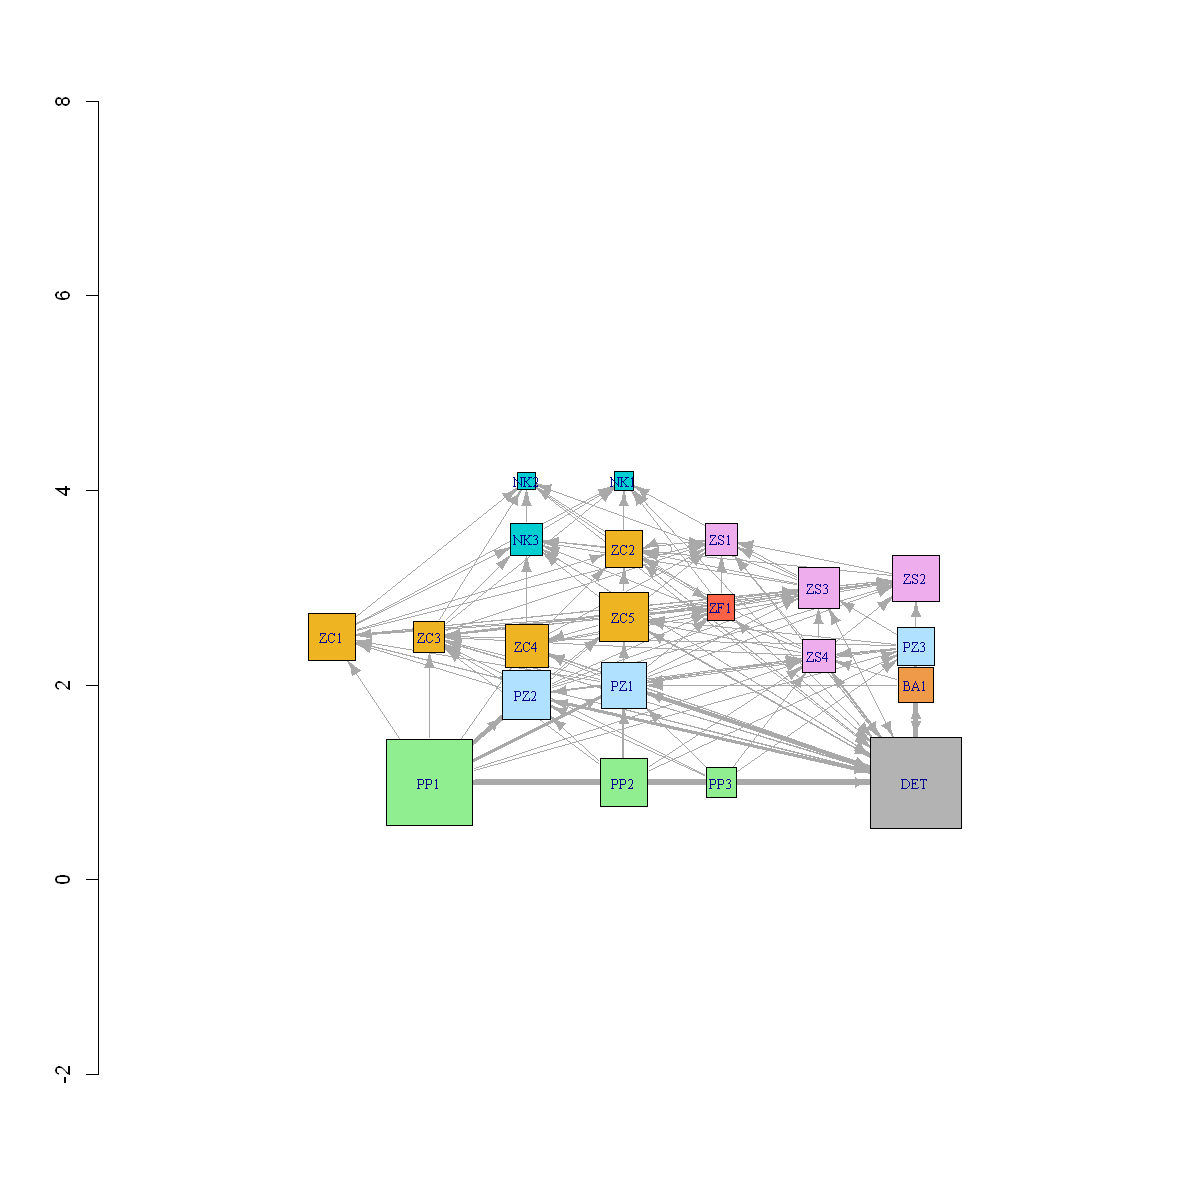

In [471]:
# a problem with adding axes and labels for TL is with asp (aspect ratio)
# I can't control axis max / min if asp = 1 and if asp = 0 then 
# weird problems arise with edge drawing
# also a box must be drawn to hide x axis

options(repr.plot.width=10, repr.plot.height=10)

V(net)$size = sqrt(V(net)$B) * 10 + 16
E(net)$width <- sqrt(E(net)$weight) * 0.1
l <- layout_nicely(net)


plot(net, edge.arrow.size=.4, axes=T,
     xlim=(c(0,10)), ylim=c(0,6),
     asp=1, rescale=F, 
     vertex.label=V(net)$lbl_shrt,
     vertex.label.font=1,
     vertex.label.cex=0.7,
     vertex.shape="square",
     layout=l)
#plot(net, edge.arrow.size=.4, axes=T, asp=0, rescale=F)
#l <- layout_in_circle(net)
#plot(net, edge.arrow.size=.4, edge.curved=.3, layout=l)

# cover the x axis
rect(-0.2, -3, 11, -1, col = "white", border = "white")

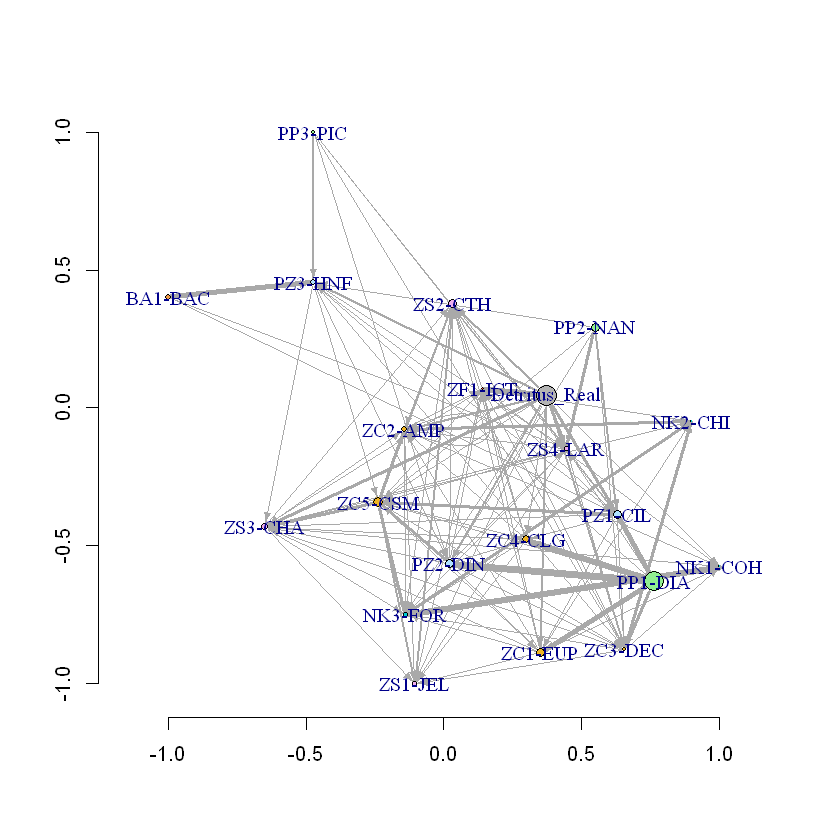

In [298]:
# the force-directed graph layout
# - didn't work because 'seeding' the graph with x,y doesn't really work, so locations are random

V(net)$size = sqrt(V(net)$B)
E(net)$width <- E(net)$weight *10
l <- layout_nicely(net)
l <- layout_with_drl(net,
                     use.seed=TRUE, 
                     seed=matrix(c(nodes1$x, nodes1$y), ncol = 2),
                     dim=2, # can be 2 or 3
                     weights=E(net)$weight)
plot(net, edge.arrow.size=.4, axes=T,layout=l)
# plot(net, edge.arrow.size=.4, axes=T, asp=0, rescale=F, xlim=(c(0,10)), ylim=c(1,5), layout=l)
#plot(net, edge.arrow.size=.4, axes=T, asp=0, rescale=F)
#l <- layout_in_circle(net)
#plot(net, edge.arrow.size=.4, edge.curved=.3, layout=l)

In [ ]:
# visNetwork doesn't work in R
visNetwork(nodes1, edges1, width="100%", height="400px", background="#eeefff",
           main="Network", submain="And what a great network it is!",
           footer= "Hyperlinks and mentions among media sources")


HTML widgets cannot be represented in plain text (need html)

In [263]:
nodes1$x

[1] 8.0 8.4 8.8 7.0 6.0 6.2 6.4 6.6 6.8 5.0 5.2 5.4 5.6 4.0 4.4 4.8 3.0 3.4 3.8
[20] 2.0 1.1